In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
dataset_dir = "C:\\Users\\Vedant Gadekar\\OneDrive - Society for Computer Technology & Research's\\Deep Learning\\PR\\DL_Labs-main\\DL_Labs-main\\notes\\cnn_detection_6\\caltech-101-img\\caltech-101-img"


dataset_datagen=ImageDataGenerator(
    rescale= 1.0/255
)

batch_size=2000

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
    
)

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train= dataset_generator[0]
x_test, y_test= dataset_generator[1]
print(len(x_train))
print(len(x_test))

2000
2000


In [11]:
weights_path = "C:\\Users\\Vedant Gadekar\\OneDrive - Society for Computer Technology & Research's\\Deep Learning\\PR\\DL_Labs-main\\DL_Labs-main\\notes\\cnn_detection_6\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"


base_model= VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [8]:
for layer in base_model.layers:
    layer.trainable=False

In [9]:
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
predictions = Dense(102,activation='softmax')(x)

model = Model(inputs = base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,852,454 (56.66 MB)

 Trainable params: 137,766 (538.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 863ms/step - accuracy: 0.1496 - loss: 4.2497 - val_accuracy: 0.3040 - val_loss: 3.4102
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 929ms/step - accuracy: 0.3521 - loss: 3.0778 - val_accuracy: 0.3790 - val_loss: 3.0075
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 947ms/step - accuracy: 0.4358 - loss: 2.6137 - val_accuracy: 0.4355 - val_loss: 2.6959
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 935ms/step - accuracy: 0.5099 - loss: 2.2582 - val_accuracy: 0.4690 - val_loss: 2.4191
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 943ms/step - accuracy: 0.5745 - loss: 1.8943 - val_accuracy: 0.5050 - val_loss: 2.2364
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 908ms/step - accuracy: 0.6746 - loss: 1.5825 - val_accuracy: 0.5290 - val_loss: 2.0903
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6916 - loss: 1.4075 - val_accuracy: 0.5370 - val_loss: 1.9882
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 960ms/step - accuracy: 0.7445 - loss: 1.2217 - val_accurac

In [ ]:
for layer in base_model.layers [len(base_model.layers)-2:]:
    layer.trainable = True
    
x= Flatten()(base_model.output)
x= Dense(512, activation='relu')(x)
x= Dropout(0.2)(x)

predictions= Dense(102,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=3,validation_data=(x_test,y_test))

In [57]:
predicted_value=model.predict(x_test)
labels=list(dataset_generator.class_indices.keys())

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step


Predicted :  ibis
Actual :  flamingo


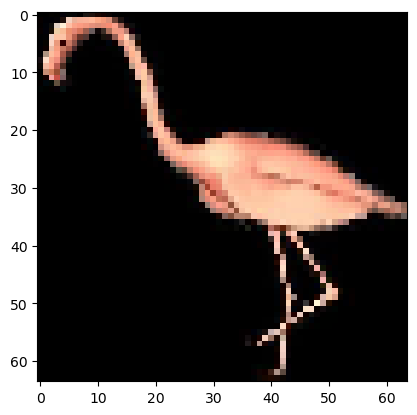

In [62]:
n=991 
plt.imshow(x_test[n])
print("Predicted : ",labels[np.argmax(predicted_value[n])])
print("Actual : ",labels[np.argmax(y_test[n])])